<center><h2><strong><font color="blue">Pendahuluan Data Mining</font></strong></h2></center>
<center><h3><strong><font color="blue"><a href="https://tau-data.id/course/adm/"> https://tau-data.id/course/adm/ </a></font></strong></h3></center>

<img alt="" src="images/Cover_ADM.png" />

<center><h2><strong><font color="blue">Supervised Learning - Classification 03</font></strong></h2></center>
<center><font color="blue">Support Vector Machines, Neural Network, Ensemble Learning, and dealing with Imbalance Data</font></center>
<center><h3><strong><font color="blue"><a href="https://tau-data.id/lesson/adm-classification-03/">https://tau-data.id/lesson/adm-classification-03/</a></font></strong></h3></center>
<b><center><h3>(C) Taufik Sutanto</h3></center>

## Outline:

* Neural Network
* Pendahuluan Model Ensemble
* Algoritma Bagging & Boosting
* Pendahuluan Imbalance Learning
* Weighted Tree Model
* Weighted Margin Models

In [1]:
# Importing Modules untuk Notebook ini
import warnings; warnings.simplefilter('ignore')
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
sns.set(style="ticks", color_codes=True)
from matplotlib.colors import ListedColormap
from sklearn import svm, preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from collections import Counter
import warnings; warnings.simplefilter('ignore')

In [2]:
df = sns.load_dataset("iris")
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
Y = df['species']
seed = 9
validation_size = 0.3
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print(X_train.shape, len(Y_test))

(105, 4) 45


In [3]:
# Neural Network: http://scikit-learn.org/stable/modules/neural_networks_supervised.html
NN = MLPClassifier(hidden_layer_sizes=(30,20))# 2 layers 30 neurons and 20 neurons
NN.fit(X_train, Y_train)
y_NN = NN.predict(X_test)
print('Akurasi = ', accuracy_score(Y_test, y_NN))

Akurasi =  1.0


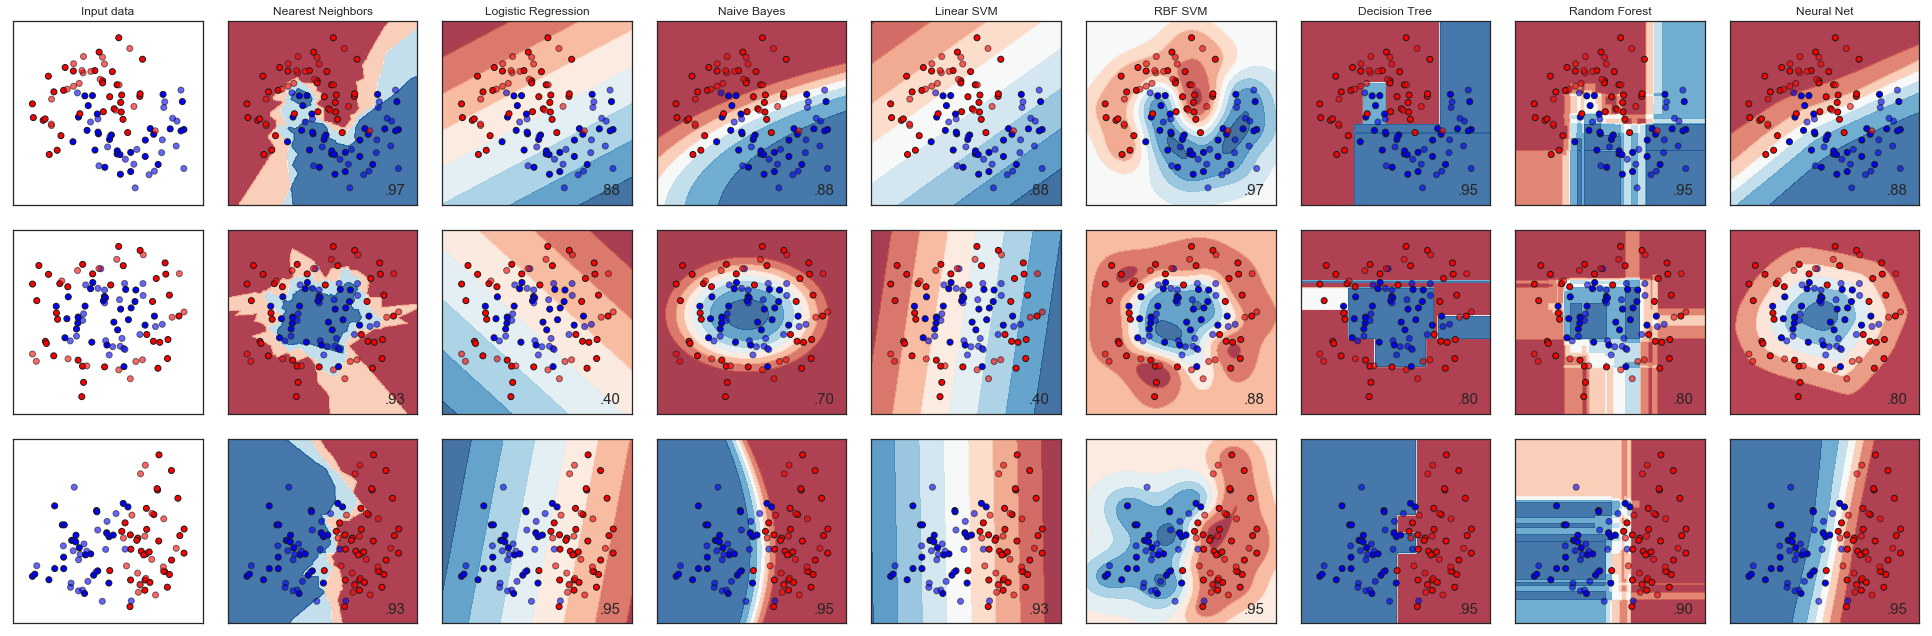

In [4]:
h, i = .02, 1  # step size in the mesh , iterate over datasets
names = ["Nearest Neighbors", "Logistic Regression", "Naive Bayes", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net"]

classifiers = [KNeighborsClassifier(3),
    LogisticRegression(solver='lbfgs',multi_class='multinomial'),
    GaussianNB(), SVC(kernel="linear", C=0.025), SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1)]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),make_circles(noise=0.2, factor=0.5, random_state=1),linearly_separable]
figure = plt.figure(figsize=(27, 9))

for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = preprocessing.StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max()); ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(()); ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max());ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(()); ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout();plt.show()

In [5]:
# Contoh Voting (Bagging) di Python
# Catatan : Random Forest termasuk Bagging Ensemble (walau modified)

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
file = 'data/diabetes_data.csv'

try:
    # Local jupyter notebook, assuming "file" is in the "data" directory
    data = pd.read_csv(file, names=names).values # Rubah ke numpy array
except:
    # it's a google colab... create folder data and then download the file from github
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/diabetes_data.csv
    data = pd.read_csv(file, names=names).values # Rubah ke numpy array

X, Y = data[:,0:8], data[:,8] # Slice
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

kNN = KNeighborsClassifier(3)
kNN.fit(X_train, Y_train)
Y_kNN = kNN.score(X_test, Y_test)

DT = DecisionTreeClassifier(random_state=1)
DT.fit(X_train, Y_train)
Y_DT = DT.score(X_test, Y_test)

model = VotingClassifier(estimators=[('k-NN', kNN), ('Decision Tree', DT)], voting='hard')
model.fit(X_train,Y_train)
Y_Vot = model.score(X_test,Y_test)

print('Akurasi k-NN', Y_kNN)
print('Akurasi Decision Tree', Y_DT)
print('Akurasi Votting', Y_Vot)

Akurasi k-NN 0.7142857142857143
Akurasi Decision Tree 0.6796536796536796
Akurasi Votting 0.7186147186147186


In [6]:
# Averaging juga bisa digunakan di Klasifikasi (ndak hanya Regresi), 
# tapi kita pakai probabilitas dari setiap kategori
T = DecisionTreeClassifier()
K = KNeighborsClassifier()
R= LogisticRegression()

T.fit(X_train,Y_train)
K.fit(X_train,Y_train)
R.fit(X_train,Y_train)

y_T=T.predict_proba(X_test)
y_K=K.predict_proba(X_test)
y_R=R.predict_proba(X_test)

Ave = (y_T+y_K+y_R)/3
print(Ave[:5]) # Print just first 5
prediction = [v.index(max(v)) for v in Ave.tolist()]
print(prediction[:5]) # Print just first 5
print('Akurasi Averaging', accuracy_score(Y_test, prediction))

[[0.92408623 0.07591377]
 [0.97943845 0.02056155]
 [0.36510851 0.63489149]
 [0.62915638 0.37084362]
 [0.49725917 0.50274083]]
[0, 0, 1, 0, 1]
Akurasi Averaging 0.7402597402597403


In [7]:
# AdaBoost
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=9)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=1)
results = model_selection.cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7421565276828435


In [8]:
data = pd.read_csv(file, names=names)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


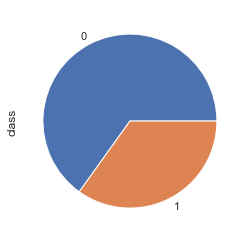

In [9]:
plot = data["class"].value_counts().plot(kind='pie')

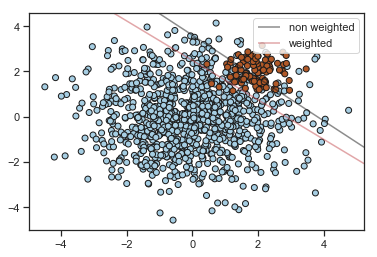

In [10]:
# Example of model-based imbalance treatment - SVM
n_samples_1, n_samples_2 = 1000, 100
centers = [[0.0, 0.0], [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],centers=centers,cluster_std=clusters_std,random_state=0, shuffle=False)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10}) #WEIGHTED SVM
wclf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')# plot the samples
ax = plt.gca()# plot the decision functions for both classifiers
xlim = ax.get_xlim(); ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)# create grid to evaluate model
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)# get the separating hyperplane
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-']) # plot decision boundary and margins
Z = wclf.decision_function(xy).reshape(XX.shape)# get the separating hyperplane for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])# plot decision boundary and margins for weighted classes
plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"], loc="upper right")
plt.show()

## Weighted Decision Tree

In [11]:
data = pd.read_csv(file, names=names).values # Rubah ke numpy array
X, Y = data[:,0:8], data[:,8] # Slice
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3)

del T
T = DecisionTreeClassifier(random_state = 0)
T.fit(X_train,Y_train)
y_DT = T.predict(X_test)
print('Akurasi  (Decision tree Biasa) = ', accuracy_score(Y_test, y_DT))
print(classification_report(Y_test, y_DT))

del T
T = DecisionTreeClassifier(class_weight = 'balanced', random_state = 0)
T.fit(X_train,Y_train)
y_DT = T.predict(X_test)
print('Akurasi  (Weighted Decision tree) = ', accuracy_score(Y_test, y_DT))
print(classification_report(Y_test, y_DT))

Akurasi  (Decision tree Biasa) =  0.6796536796536796
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       141
         1.0       0.60      0.52      0.56        90

    accuracy                           0.68       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.67      0.68      0.67       231

Akurasi  (Weighted Decision tree) =  0.6883116883116883
              precision    recall  f1-score   support

         0.0       0.72      0.79      0.76       141
         1.0       0.62      0.52      0.57        90

    accuracy                           0.69       231
   macro avg       0.67      0.66      0.66       231
weighted avg       0.68      0.69      0.68       231



<h1 id="EoM">End of Module<br />
<hr />
